# Figure S4f:
## Elephant Butte Water Level during FPT Station Deployment
- Link to Elephant Butte water level data download: https://waterdatafortexas.org/reservoirs/individual/elephant-butte

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
from matplotlib.dates import DateFormatter, AutoDateLocator
import matplotlib.dates as mdates

## First import the data

### 1. Elephant Butte water level data

In [3]:
# Load data from file
eb = pd.read_csv('../Hydro_Data/TWDB/ElephantButte_1916-2022.csv', skiprows=57) 

# Convert date column to to_datetime pandas object
eb['date']= pd.to_datetime(eb['date'], errors='coerce', yearfirst=True)

# Convert water level from ft to m
eb['water_level_m'] = eb['water_level']*0.3048
eb

# Preview dataframe
eb.head()

,date,water_level,surface_area,reservoir_storage,conservation_storage,percent_full,conservation_capacity,dead_pool_capacity,water_level_m
0,1916-01-01,4307.7,6755.45,161953.0,161953,8.1,2010900.0,0.0,1312.98696
1,1916-01-02,4307.7,6755.45,161953.0,161953,8.1,2010900.0,0.0,1312.98696
2,1916-01-03,4307.7,6755.45,161953.0,161953,8.1,2010900.0,0.0,1312.98696
3,1916-01-04,4307.9,6789.12,163307.0,163307,8.1,2010900.0,0.0,1313.04792
4,1916-01-05,4308.1,6822.96,164668.0,164668,8.2,2010900.0,0.0,1313.10888


Note that some water_level data had to be manually removed due to errors in data file (in data prior to 1920)

## Make Figure S4f

In [4]:
# Select elephant butte water level only over the past decade (2012-2022)
mask = (eb['date'] >= '2022-04-27') & (eb['date'] <= '2022-07-04')
eb_fpt = eb.loc[mask]
eb_fpt

,date,water_level,surface_area,reservoir_storage,conservation_storage,percent_full,conservation_capacity,dead_pool_capacity,water_level_m
38750,2022-04-27,4319.13,8826.54,250581.0,250581,12.8,1960900.0,0.0,1316.470824
38751,2022-04-28,4319.32,8863.51,252262.0,252262,12.9,1960900.0,0.0,1316.528736
38752,2022-04-29,4319.52,8902.44,254038.0,254038,13.0,1960900.0,0.0,1316.589696
38753,2022-04-30,4319.69,8935.52,255554.0,255554,13.0,1960900.0,0.0,1316.641512
38754,2022-05-01,4319.85,8966.67,256987.0,256987,13.1,1960900.0,0.0,1316.690280
...,...,...,...,...,...,...,...,...,...
38814,2022-06-30,4306.67,6582.04,155084.0,155084,7.9,1960900.0,0.0,1312.673016
38815,2022-07-01,4306.36,6529.85,153052.0,153052,7.8,1960900.0,0.0,1312.578528
38816,2022-07-02,4306.10,6486.08,151360.0,151360,7.7,1960900.0,0.0,1312.499280
38817,2022-07-03,4305.90,6452.70,150066.0,150066,7.7,1960900.0,0.0,1312.438320


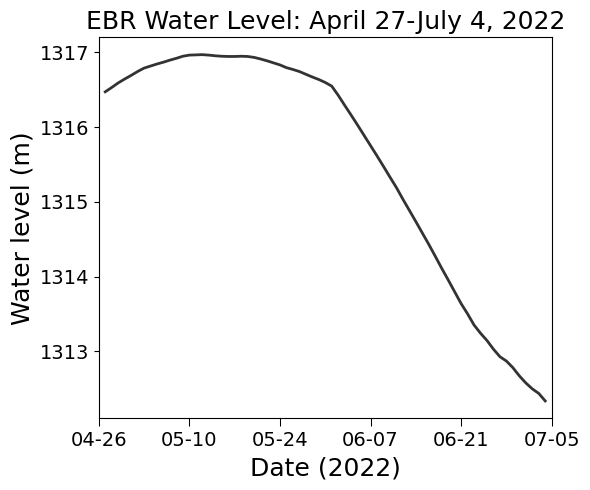

In [5]:
# Build the figure
fig = plt.figure(figsize = (6, 5))
ax = fig.add_subplot()

# Add water level data for left axis
lns1 = ax.plot(eb_fpt['date'], eb_fpt['water_level_m'], '-', color='k',label = 'Water level', linewidth=2, alpha=0.8)

# Format axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format plot
left = date(2022, 4, 26)
right = date(2022, 7, 5)

ax.set_xlabel('Date (2022)', size = 18), ax.set_ylabel('Water level (m)', size = 18)
ax.xaxis.set_tick_params(labelsize=14, length=6, width=0.75), ax.yaxis.set_tick_params(labelsize=14)
#ax.xaxis.set_label_coords(.5,-.13)

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

plt.title('EBR Water Level: April 27-July 4, 2022', size = 18)
plt.gca().set_xbound(left, right)
plt.tight_layout()

# Save figure to folder
fig.savefig('Saved_Figures/FigureS4f', dpi=150)

plt.show()